<a href="https://colab.research.google.com/github/izumizawa/mc886y2021/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
## MC886 A - Machine Learning
### Profª Esther Colombini
#### First Semester 2021

# Group

- Mariana Megumi Izumizawa - RA 221859
- Matheus Carvalho Hatzlhoffer- RA 222174

# Part I - Clustering Methods

Implementation of k-means and another unsupervised learning method, in our case it is DBSCAN (Density Based Spatial Clustering of Application with Noise).

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import math

## Data splitting in training and test sets
Returns first `training set` and then `test set` depending on the percentage in argument.

In [ ]:
def split_data(data, test_percent):
  test_numbers = int(round(test_percent*len(data)))
  shuffled_data = data[:]
  random.shuffle(shuffled_data)
  return shuffled_data[test_numbers:], shuffled_data[:test_numbers]

## Pre-processing data

Data normalization using the following formula:

![Formula](https://miro.medium.com/max/341/0*oRhJXkyKqqYp8--e.)

In [11]:
def normalization(data):
  max_x = np.max(data, axis=0)[0]
  min_x = np.min(data, axis=0)[0]
  max_y = np.max(data, axis=0)[1]
  min_y = np.min(data, axis=0)[1]
  for x in data:
    x[0] = (x[0] - min_x)/(max_x - min_x)
    x[1] = (x[1] - min_y)/(max_y - min_y)

### K-means implementation

In [ ]:
def k_means(k, data):
  centers = np.array(random.sample(list(data), k))
  old_centers = np.zeros(centers.shape)
  clusters = []

  for i in range(k):
    clusters.append([])

  while not (np.array_equal(old_centers, centers)):
    for i in range(k):
      clusters[i] = []
    old_centers = deepcopy(centers)
    for i in range(len(data)):
      winner_distance = math.sqrt(math.pow(np.max(data, axis=0)[0], 2) + math.pow(np.max(data, axis=0)[1], 2))
      winner_cluster = 0
      for j in range(len(centers)):
        distance = math.sqrt(math.pow(centers[j][0] - data[i][0], 2) + math.pow(centers[j][1] - data[i][1], 2))
        if (distance < winner_distance):
          winner_distance = distance
          winner_cluster = j
      clusters[winner_cluster].append(list(data[i].astype(float)))

    for i in range(k):
      center_x = np.mean([x[0] for x in clusters[i]])
      center_y = np.mean([x[1] for x in clusters[i]])
      centers[i] = [center_x, center_y]

  return centers, clusters

## Show clusters with different colors

In [ ]:
def print_clusters(centers, clusters):
  clusters = np.array(clusters, dtype=object)
  for i in range(len(clusters)):
    clusters[i] = np.array(clusters[i])

  colors = cm.rainbow(np.linspace(0, 1, len(clusters)))
  for y, c in zip(clusters, colors):
      plt.scatter(y[:,0], y[:,1], color=c)

  plt.scatter(centers[:,0], centers[:,1], c='black')
  plt.grid()
  plt.show()

## Apply functions with given dataset (`cluster.dat`)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cluster.dat to cluster.dat


In [50]:
string_data = ([np.array(x.split(" ")) for x in uploaded['cluster.dat'].decode("utf-8").split('\n')])
# Cleaning data
string_data = string_data[:-1]
data = np.array([x.astype(float) for x in string_data])

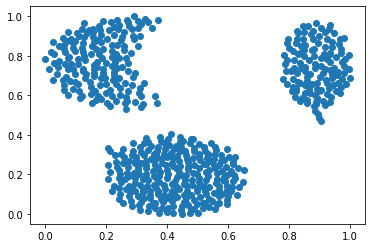

In [66]:
plt.scatter(data[:,0], data[:,1])

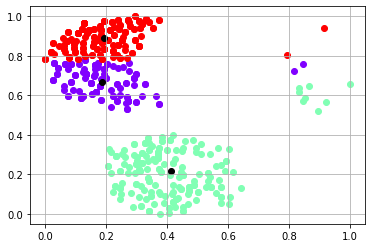

In [ ]:
training_set, test_set = split_data(data, 0.1)
normalization(training_set)
centers, clusters = k_means(3, training_set)
print_clusters(centers, clusters)

[0.0, 0.04498287862696863, 0.03511066839276262, 0.042781167892423755, 0.058837048762424994, 0.06707093400564122, 0.07942912110692947, 0.07640114813292431, 0.0986899593261247, 0.09606623822189211, 0.09988304235979231, 0.0989128055713569, 0.1015151515151515, 0.14587257582594187, 0.12673204676719899, 0.11267896525284332, 0.1274794724838539, 0.1294967819208386, 0.13334600438998656, 0.1381695437822308, 0.14958904753069086, 0.1534272517169678, 0.1789390157160083, 0.16865209206139367, 0.16467474931902765, 0.14408784038838696, 0.15668174516889372, 0.1724847868098917, 0.19129049884163107, 0.188447293745371, 0.1851271233462508, 0.19878248218015665, 0.19398778211961648, 0.2024320161387174, 0.1962633071474196, 0.19494525275713592, 0.24438226386400747, 0.216660507277582, 0.22158678543682456, 0.23344104872124227, 0.24304412081082605, 0.25418879425111834, 0.2732849268559459, 0.2708801796148175, 0.25735960267362135, 0.2290411762219375, 0.22359141506596808, 0.2377387329644602, 0.218450680798611, 0.2526

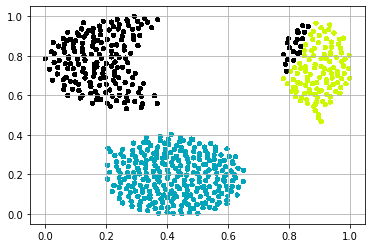

In [88]:
eps = 0.5
min_points = 20
normalization(data)

cluster_id = 0
clusters = [-1]*len(data)
distances = []
for i in range(len(data)):
  if(clusters[i] == -1):
    neighbor_count = 0
    neighbors = []
    for j in range(len(data)):
      dist = math.sqrt(math.pow(data[j][0] - data[i][0], 2) + math.pow(data[j][1] - data[i][1], 2))
      distances.append(dist)
      if (dist <= eps):
        neighbor_count += 1
        neighbors.append(j)
    if (neighbor_count >= min_points):
      for x in neighbors:
        if (clusters[x] == -1):
          clusters[x] = cluster_id
    cluster_id += 1

print(distances)
distances = np.array(distances)
print(distances.mean())
print(np.std(distances))

if(cluster_id != 0):
  for i in range(len(data)):
    colors = cm.nipy_spectral(np.array(clusters).astype(float) / cluster_id)
    plt.scatter(data[:,0], data[:,1], color=colors, s=10)
plt.grid()
plt.show()



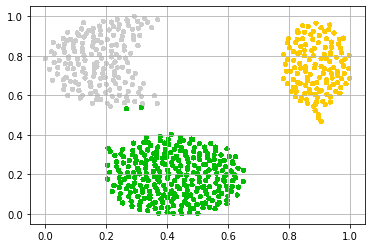

In [87]:
eps = 0.4
min_points = 5
normalization(data)

cluster_id = 2
clusters = [1]*len(data)
distances = []
shuffle_index = np.arange(len(data))
np.random.shuffle(shuffle_index)

for i in shuffle_index:
  if(clusters[i] == 1):
    neighbor_count = 0
    neighbors = []
    for j in range(len(data)):
      dist = math.sqrt(math.pow(data[j][0] - data[i][0], 2) + math.pow(data[j][1] - data[i][1], 2))
      distances.append(dist)
      if (dist <= eps):
        neighbor_count += 1
        neighbors.append(j)
    if (neighbor_count >= min_points):
      for x in neighbors:
        if (clusters[x] == 1):
          clusters[x] = cluster_id
      cluster_id += 1

if(cluster_id != 2):
  for i in range(len(data)):
    colors = cm.nipy_spectral(np.array(clusters).astype(float) / (cluster_id-1))
    plt.scatter(data[:,0], data[:,1], color=colors, s=10)
plt.grid()
plt.show()